In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

from yellowbrick.regressor import ResidualsPlot

In [62]:
rawDf = pd.read_csv("data/tier7b.csv")
df = rawDf.copy()
df.isRelay = df.isRelay.astype(int)

In [63]:
df2018 = df.loc[df["year"] == 2018]
testSet = df2018.sample(frac = 0.7, random_state = 42)
testY = testSet.pop("points")
testX = testSet.copy()

trainSet = df[~df.index.isin(testSet.index)]
trainY = trainSet.pop("points")
trainX = trainSet.copy()

trainX = trainX.drop(["school", "year", "divsRank", "divsTimePctOfMean"], axis = 1)
testX = testX.drop(["school", "year", "divsRank", "divsTimePctOfMean"], axis = 1)

In [64]:
svr = SVR(gamma = "scale")
svr = svr.fit(trainX, trainY)
scores = cross_val_score(svr, trainX, trainY, cv=4)
print(f"R^2: {scores.mean()} (+/- {scores.std() * 2})")

R^2: 0.7575896472490924 (+/- 0.2008876223774898)


In [65]:
predictedY = svr.predict(testX)
errors = testY - predictedY
print("MAE:", errors.abs().mean())

MAE: 1.5605193579785441


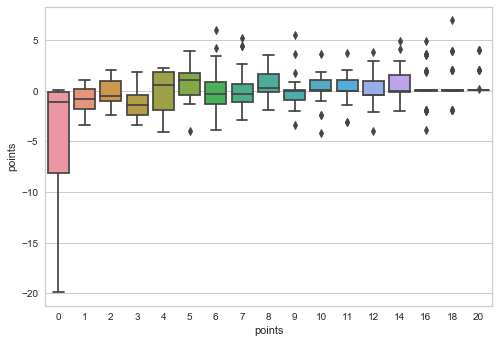

In [67]:
sns.boxplot(x = testY, y = errors)